# Exercícios de Fixação - KNN

---

## Geração dos dados

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
nivel_mistura = 0.5
n_pontos_por_classe = 50
n_total = n_pontos_por_classe * 2

x = np.random.uniform(0, 1, n_total)
y = np.random.uniform(0, 1, n_total)

dist_11 = np.sqrt((x - 1)**2 + (y - 1)**2)
dist_00 = np.sqrt((x - 0)**2 + (y - 0)**2)

prob_classe_1 = (dist_00 - dist_11 + np.random.normal(0, nivel_mistura, n_total)) / 2

indices_ordenados = np.argsort(prob_classe_1)

labels = np.ones(n_total) * -1
labels[indices_ordenados[-n_pontos_por_classe:]] = 1

X = np.column_stack((x, y))
Y = labels

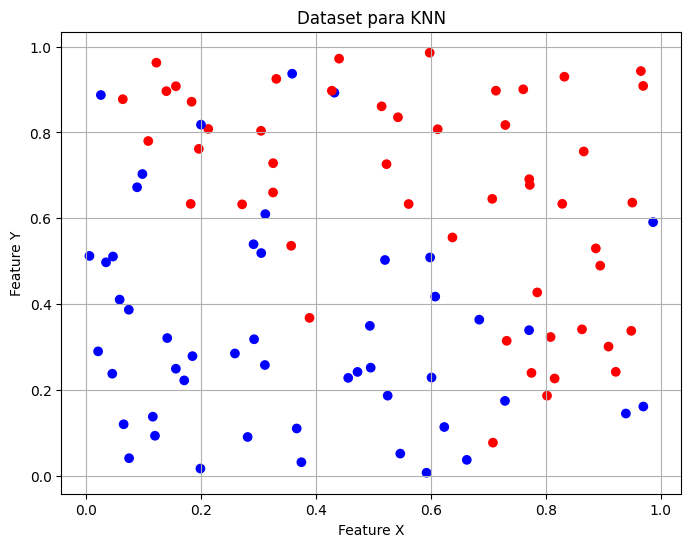

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o')
plt.title('Dataset para KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

---

## Exercício de Fixação 1

### Criação da função KNN

In [10]:
def knn(X, Y, xt, k):
    # calculando distancia entre xt e todos os outros pontos
    dist = (((X.T-xt).T)**2).sum(axis=1)
    # predição usando o sinal da soma dos k vizinhos mais próximos
    pred = np.sign(Y[dist.argsort()[:k]].sum())
    return pred

In [8]:
k = 9
xt = np.array([0.5, 0.5]).reshape(2,1)


In [9]:
knn(X, Y, xt, k)

-1.0

### Geração da superficie

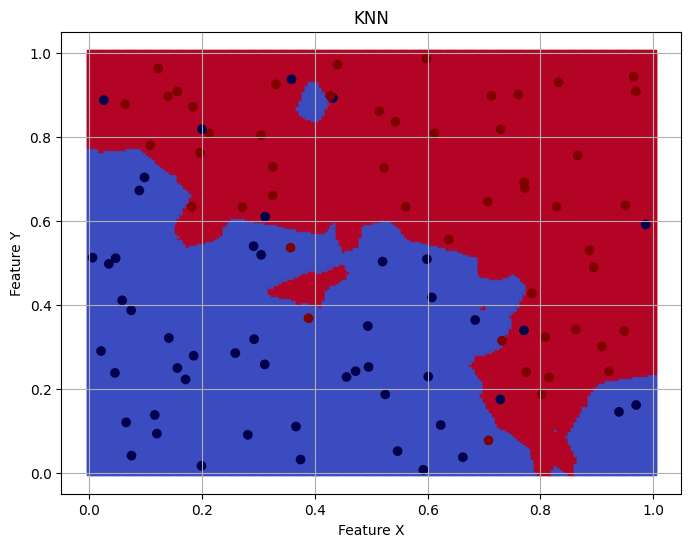

In [ ]:
k=3
results_coords = []
results_labels = []
for i in np.linspace(0, 1, 200):
    for j in np.linspace(0, 1, 200):
        xt = np.array([i, j])
        results_coords.append(xt)
        label = knn(X, Y, xt.reshape(2,1), k)
        results_labels.append(label)

results_coords = np.array(results_coords)
plt.figure(figsize=(8, 6))
plt.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='coolwarm',alpha=1,s=15,marker="s")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='seismic', marker='o')
plt.title('KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

Testando valores de K diferentes:

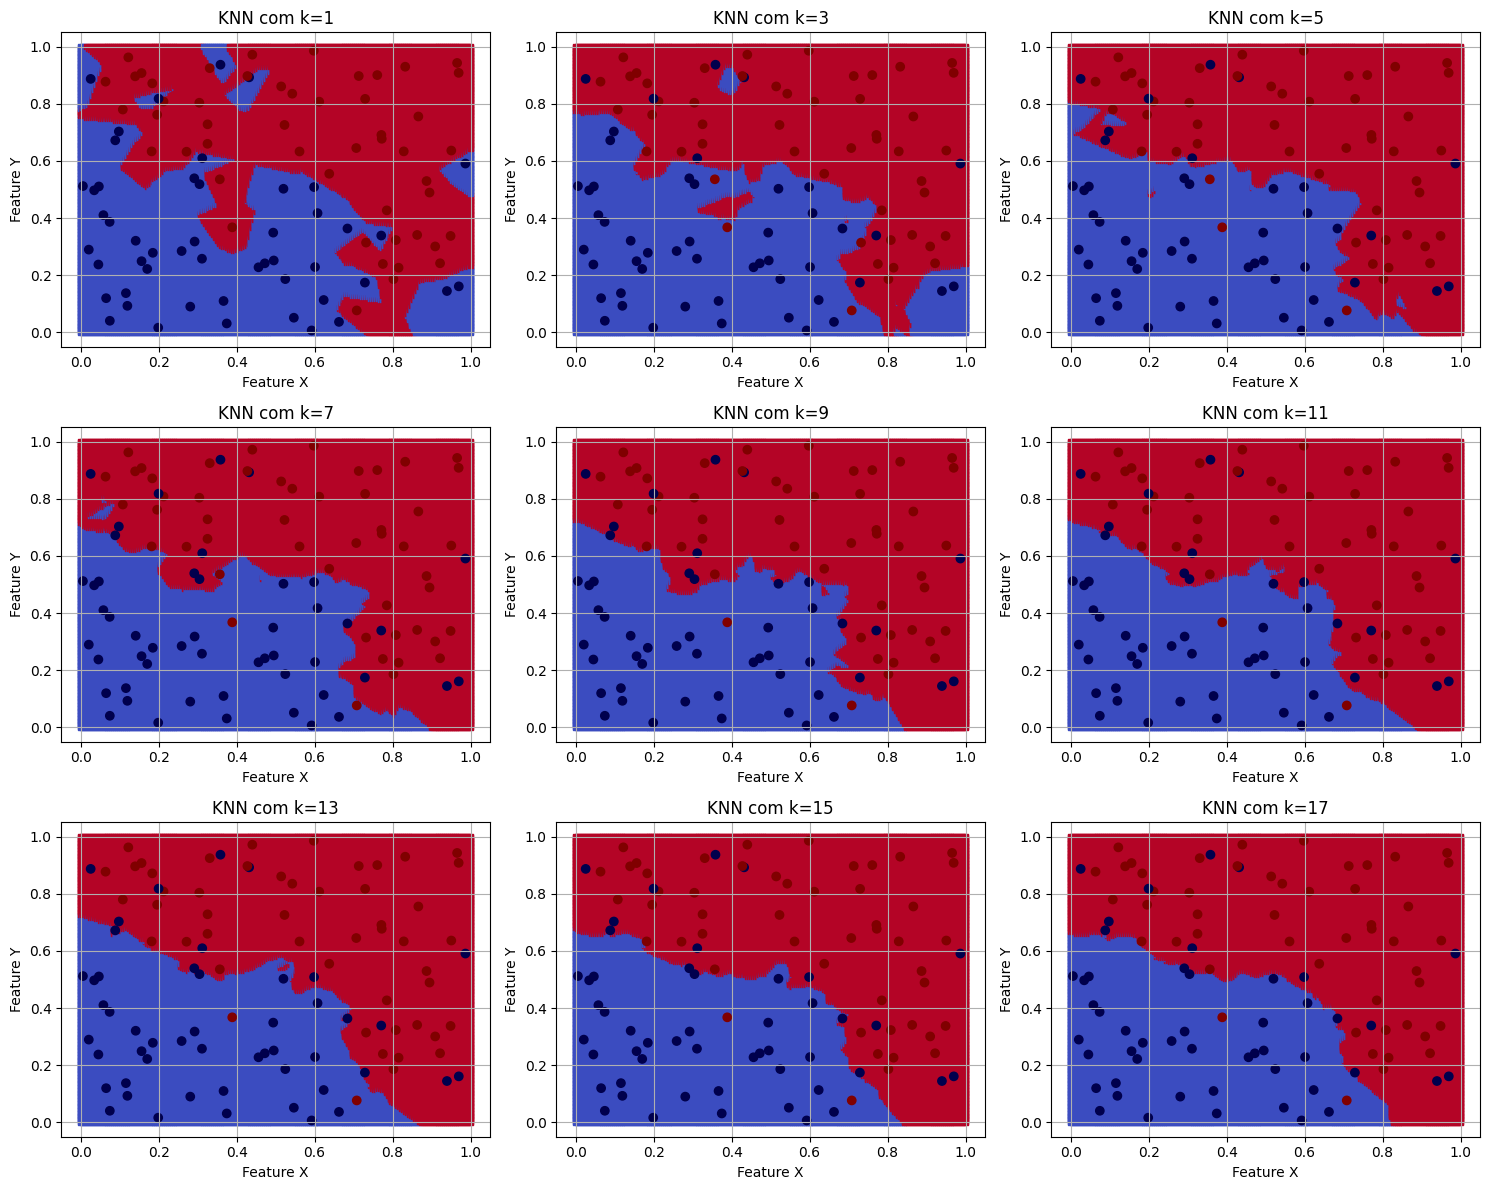

In [15]:
k_values = range(1, 1 + 2 * 9, 2)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for ax, k in zip(axes.flatten(), k_values):
    results_coords = []
    results_labels = []
    for i in np.linspace(0, 1, 200):
        for j in np.linspace(0, 1, 200):
            xt = np.array([i, j])
            results_coords.append(xt)
            label = knn(X, Y, xt.reshape(2, 1), k)
            results_labels.append(label)

    results_coords = np.array(results_coords)
    ax.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='coolwarm', alpha=1, s=15, marker="s")
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='seismic', marker='o')
    ax.set_title(f'KNN com k={k}')
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Feature Y')
    ax.grid(True)

plt.tight_layout()
plt.show()

Quando iteramos gerando os gráficos para valores de k cada vez maiores é fácil perceber que com k pequenos o modelo tem uma tendência a fazer overfitting. Pontos de dados isolados criam uma ilha de predição em regiões em que o label médio local é outro. Na medida que o k aumenta é possivel perceber que essas ilhas passam a deixar de existir e as superficies de predição ficam mais uniformes e continuas. Isso vai causar um erro maior em predições dentro do dataset de treino, contudo vai ser mais bem generalizado para um dataset de teste gerado da mesma distribuição.

---

## Exercício de Fixação 2

Determinação da função de densidade

In [17]:
def pdfnvar(x, m, K, n=2):
    x = np.asarray(x).reshape(-1)  # Garante que x é um vetor 1D
    m = np.asarray(m).reshape(-1)  # Garante que m é um vetor 1D
    diff = x - m
    exponent = -0.5 * np.dot(diff.T, np.linalg.solve(K, diff))  # Usa np.linalg.solve para evitar problemas
    denominator = np.sqrt((2 * np.pi) ** n * np.linalg.det(K))
    return (1 / denominator) * np.exp(exponent)


Adaptação da função knn para considerar distância

In [18]:
def knn_dist(X, Y, xt, k , h=2):
    dist = (((X.T-xt).T)**2).sum(axis=1)
    n = X.shape[1]
    K = h*np.eye(n)
    sumk = 0
    for datapoint,label in zip(X[dist.argsort()[:k]],labels[dist.argsort()[:k]]):
        sumk += label * pdfnvar(datapoint, xt, K, n)
    pred = np.sign(sumk)
    return pred

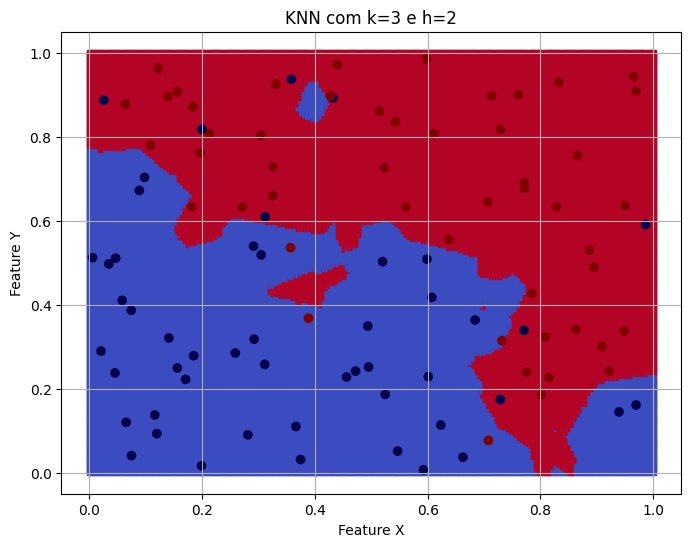

In [21]:
k=3
h=0.1
results_coords = []
results_labels = []
for i in np.linspace(0, 1, 200):
    for j in np.linspace(0, 1, 200):
        xt = np.array([i, j])
        results_coords.append(xt)
        label = knn_dist(X, Y, xt.reshape(2,1), k, h=h)
        results_labels.append(label)

results_coords = np.array(results_coords)
plt.figure(figsize=(8, 6))
plt.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='coolwarm',alpha=1,s=15,marker="s")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='seismic', marker='o')
plt.title(f'KNN com k={k} e h={2}')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

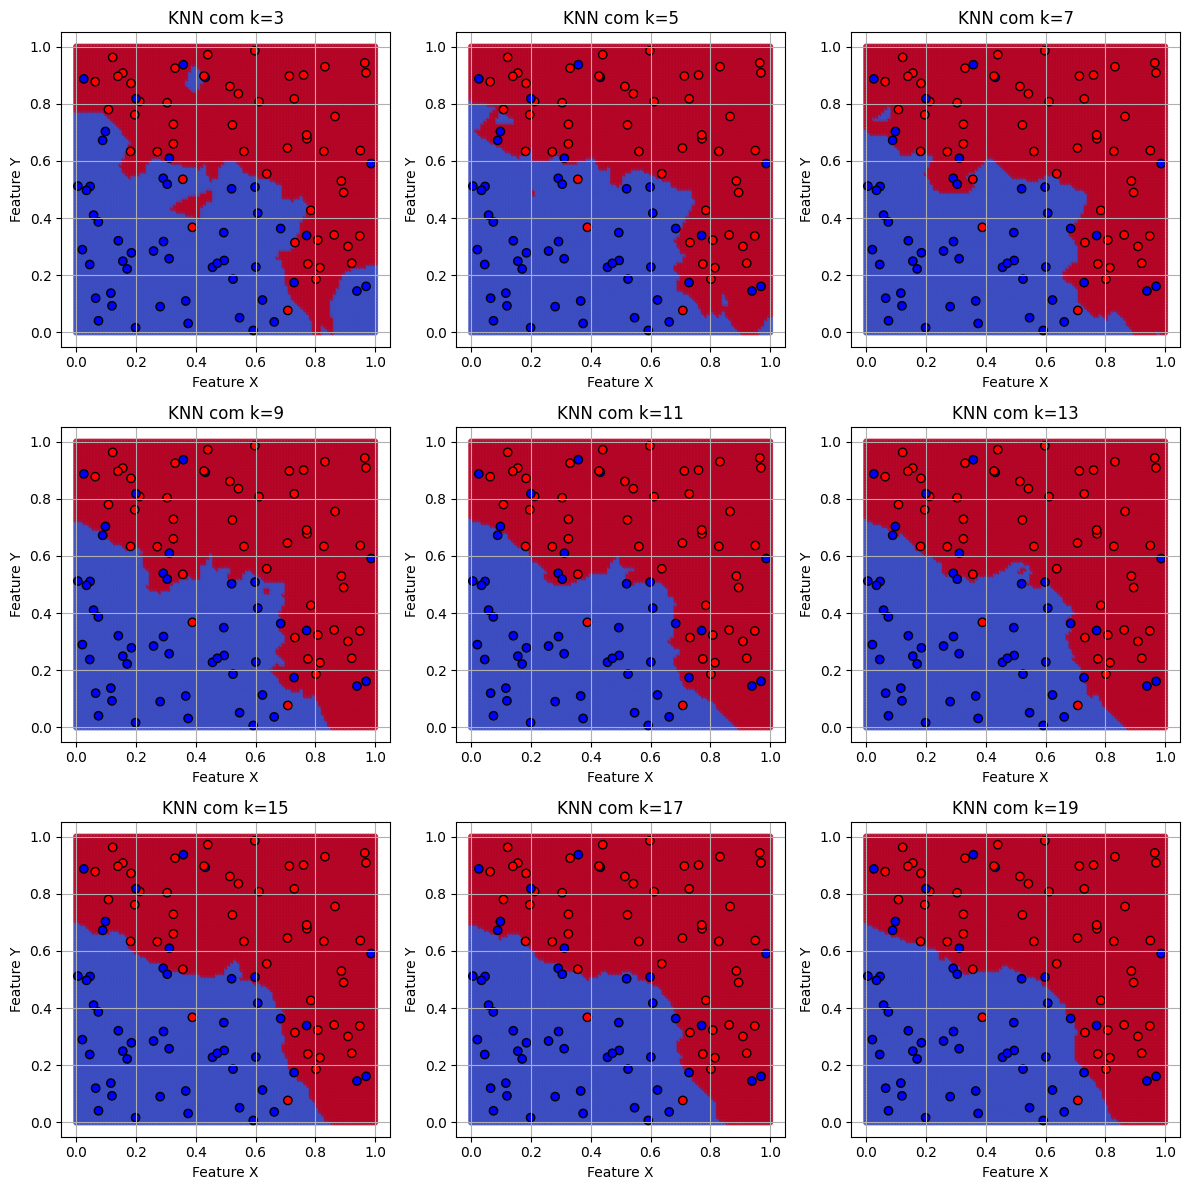

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  

k_values = range(3, 21, 2) 
h = 0.05

for ax, k in zip(axes.ravel(), k_values):  
    results_coords = []
    results_labels = []

    for i in np.linspace(0, 1, 100):
        for j in np.linspace(0, 1, 100):
            xt = np.array([i, j])
            results_coords.append(xt)
            label = knn_dist(X, Y, xt.reshape(2, 1), k, h =h)
            results_labels.append(label)

    results_coords = np.array(results_coords)
    ax.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='coolwarm', alpha=0.7, s=50, marker=".")
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o', edgecolors='black')
    ax.set_title(f'KNN com k={k}')
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Feature Y')
    ax.grid(True)

plt.tight_layout()
plt.show()

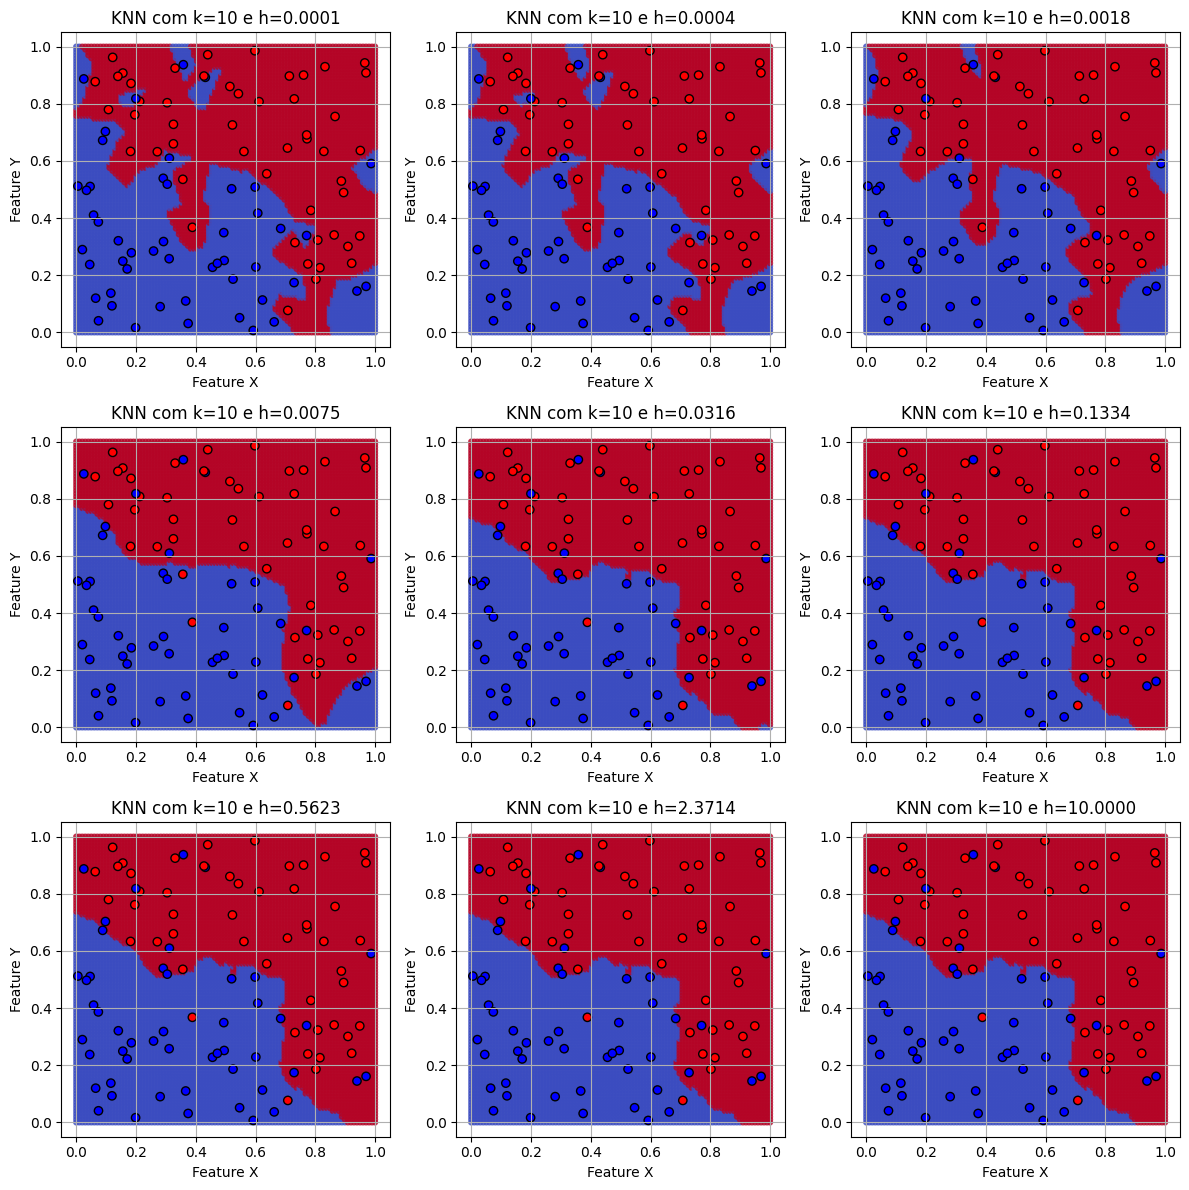

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

h_values = np.logspace(-4, 1, 9)
k = 10  

for ax, h in zip(axes.ravel(), h_values):
    results_coords = []
    results_labels = []

    for i in np.linspace(0, 1, 100):
        for j in np.linspace(0, 1, 100):
            xt = np.array([i, j])
            results_coords.append(xt)
            label = knn_dist(X, Y, xt.reshape(2, 1), k, h=h)
            results_labels.append(label)

    results_coords = np.array(results_coords)
    ax.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='coolwarm', alpha=0.7, s=50, marker=".")
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o', edgecolors='black')
    ax.set_title(f'KNN com k=10 e h={h:.4f}')
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Feature Y')
    ax.grid(True)

plt.tight_layout()
plt.show()

Quando aumentamos o k e mantemos o h constante temos um resultado semelhante ao sem distância. Com o aumento do k podemos perceber a diminnuição do overfitting e das ilhas de predição, suavizando as fronteiras de predição. Quando mantemos o k constante e modificamos o h temos um comportamento em que, com h pequeno vamos ter muito overfitting. Isso ocorre por que os pontos que mais influenciam são os muito proximos do ponto de predição. Ao aumentarmos esse raio temos um efeito semelhante ao aumento do k: o overfitting vai diminuindo e as fronteiras de predição vão sendo suavizadas.

---